Epoch: 0050 cost= 0.208275646 W= 0.45217365 b= -0.65588015
Epoch: 0100 cost= 0.193106845 W= 0.44012523 b= -0.56920487
Epoch: 0150 cost= 0.179689810 W= 0.42879352 b= -0.4876849
Epoch: 0200 cost= 0.167822063 W= 0.41813558 b= -0.4110127
Epoch: 0250 cost= 0.157325029 W= 0.4081117 b= -0.33890137
Epoch: 0300 cost= 0.148040280 W= 0.39868388 b= -0.27107844
Epoch: 0350 cost= 0.139827847 W= 0.38981676 b= -0.20728914
Epoch: 0400 cost= 0.132563964 W= 0.381477 b= -0.14729369
Epoch: 0450 cost= 0.126139104 W= 0.3736334 b= -0.090866484
Epoch: 0500 cost= 0.120456457 W= 0.3662561 b= -0.037795205
Epoch: 0550 cost= 0.115430266 W= 0.35931757 b= 0.01211969
Epoch: 0600 cost= 0.110984690 W= 0.35279185 b= 0.059065934
Epoch: 0650 cost= 0.107052773 W= 0.34665406 b= 0.10322
Epoch: 0700 cost= 0.103575140 W= 0.34088144 b= 0.1447481
Epoch: 0750 cost= 0.100499339 W= 0.33545214 b= 0.18380627
Epoch: 0800 cost= 0.097779013 W= 0.33034566 b= 0.22054146
Epoch: 0850 cost= 0.095373064 W= 0.325543 b= 0.25509185
Epoch: 0900 co

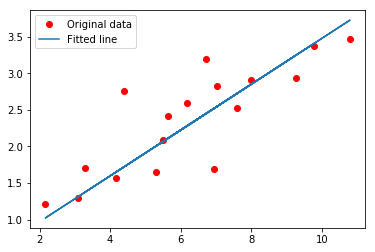

In [2]:
#4.常量、变量、占位符
#4.1 构建二元线性回归模型，其中模型中的参数使用`tf.Variable()`构建，模型的样本输入使用`tf.placeholder`代替。写出模型结构
#4.2 使用`tf.placeholder`代替上述样本中的标记，写出对于一个样本的代价。
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50
# 训练数据
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
# 构建线性模型
pred = tf.add(tf.multiply(X, W), b)
# 求误差,一个样本的代价
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 使用梯度下降拟合数据
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 初始化所有变量
init = tf.initialize_all_variables()
# 开始
with tf.Session() as sess: 
    sess.run(init)
    # Fit all training data 
    for epoch in range(training_epochs): 
        for (x, y) in zip(train_X, train_Y): 
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),  "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [ ]:
#5.名字与作用域

#5.1 总结`name_scope`与`variable_scope`的作用以及异同点。

#作用：
#name_scope可以为其作用域中的节点的name添加一个或多个前缀，并使用这些前缀作为划分内部和外部op范围的标记。同时在TensorBoard可视化时
#可以作为一个整体出现（也可以展开），并且name_scope可以嵌套使用，代表不同层级的功能的划分。
#variable_scope主要用于管理变量作用域以及与变量相关的操作，也可以给不同操作区域划分范围（添加name前缀），可以与tf.get_variable()等
#配合使用完成对变量的重复使用

#相同点
#1.都能给不同操作区域划分范围
#2.可以嵌套，不同级的name可以相同
#3.variable_scope包含了name_scope的全部功能

#不同点：
#1.创建相同name的多个name_scope时，TensorFlow会自动给name_scope的name加上后缀，创建相同name的多个variable_scope时，相当于创建了
#一个variable_scope与多个name_scope
#2.variable_scope对象包含一个reuse属性，默认的值为None,是不可重用的，此时，tf.get_variable()是创建变量,值为True时，是可重用的，此时
#tf.get_variable()的用法变成利用name获取已存在的变量
#3.tf.get_variable()创建的变量不能使用name_scope加前缀,其只能与variable_scope配合完成相应的功能
#4.variable_scope如果在嵌套的一个变量作用域里使用之前预定义的一个作用域，则会跳过当前变量作用域，保持预先存在的作用域不变

In [35]:
#5.2 构建逻辑回归模型（只有模型部分，不包括训练部分），使用`get_variable`与`variable_scope`将变量的创建与使用分开。
#提示：使用`tf.nn.sigmoid`实现`logistic`函数。

import tensorflow as tf
# 与对数几率回归相同的参数和变量初始化
#tf.get_variable(name="weights", dtype = tf.float32, shape = [5, 1]) 
#tf.get_variable(name="bias", dtype = tf.float32, shape = []) 
# 之前的推断现在用于值的合并 
def combine_inputs(X): 
    return tf.matmul(X, W) + b 
# 新的推断值是将sigmoid函数运用到前面的合并值的输出 
def inference(X): 
    return tf.sigmoid(combine_inputs(X))
def loss(X, Y):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(combine_inputs(X), Y))
g = tf.Graph()
with g.as_default():
    with tf.variable_scope('one', reuse=None) as scope:
        tf.get_variable(name = "weights", dtype = tf.float32, shape = [5, 1]) 
        tf.get_variable(name = "bias", dtype = tf.float32, shape = []) 
        scope.reuse_variables()
        W = tf.get_variable('weights')
        b = tf.get_variable('bias')